이 노트북의 코드에 대한 설명은 [반복 교차 검증](https://tensorflow.blog/2017/12/27/%EB%B0%98%EB%B3%B5-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D/) 글을 참고하세요.

In [1]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy

CPython 3.5.4
IPython 6.2.1

sklearn 0.19.1
numpy 1.13.3
scipy 1.0.0


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
logreg = LogisticRegression()

RepeatedKFold

In [5]:
kfold = KFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
scores, scores.mean()

(array([ 1.        ,  0.93333333,  0.43333333,  0.96666667,  0.43333333]),
 0.7533333333333333)

In [6]:
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rkfold)
scores, scores.mean()

(array([ 1.        ,  0.93333333,  0.9       ,  0.96666667,  0.96666667,
         0.96666667,  0.93333333,  1.        ,  1.        ,  0.83333333,
         0.93333333,  0.9       ,  0.96666667,  0.9       ,  0.93333333,
         0.96666667,  1.        ,  0.96666667,  0.93333333,  0.93333333,
         0.96666667,  0.9       ,  1.        ,  0.93333333,  0.93333333]),
 0.94666666666666677)

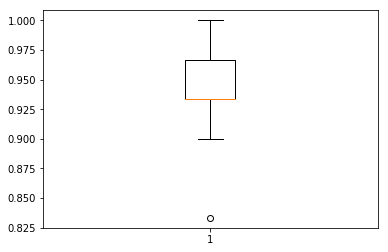

In [7]:
plt.boxplot(scores)
plt.show()

RepeatedStratifiedKFold

In [8]:
skfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=skfold)
scores, scores.mean()

(array([ 1.        ,  0.96666667,  0.93333333,  0.9       ,  1.        ]),
 0.96000000000000019)

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)
scores, scores.mean()

(array([ 0.96666667,  0.96666667,  0.96666667,  0.93333333,  0.96666667,
         0.86666667,  0.96666667,  0.96666667,  0.93333333,  0.96666667,
         1.        ,  1.        ,  0.93333333,  0.93333333,  0.93333333,
         1.        ,  0.96666667,  0.96666667,  0.9       ,  0.96666667,
         0.96666667,  0.96666667,  0.96666667,  0.9       ,  0.96666667]),
 0.95466666666666655)

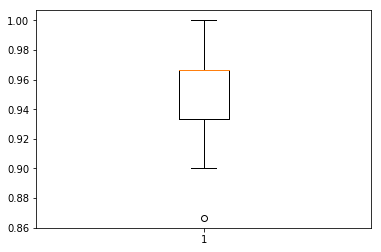

In [10]:
plt.boxplot(scores)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(logreg, param_grid, cv=rskfold, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x1a15e03198>,
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
grid_search.score(X_test, y_test), grid_search.best_params_, grid_search.best_score_

(1.0, {'C': 100}, 0.96250000000000002)

In [13]:
for k in grid_search.cv_results_:
    if 'split' in k:
        print(k, grid_search.cv_results_[k])

split21_test_score [ 0.34782609  0.65217391  0.82608696  0.91304348  0.86956522  0.91304348
  0.86956522]
split6_test_score [ 0.34782609  0.65217391  0.7826087   0.91304348  0.95652174  0.95652174
  0.95652174]
split24_train_score [ 0.34065934  0.64835165  0.83516484  0.94505495  0.96703297  0.96703297
  0.96703297]
split3_train_score [ 0.34444444  0.65555556  0.82222222  0.95555556  0.96666667  0.96666667
  0.96666667]
split2_test_score [ 0.34782609  0.65217391  0.86956522  0.91304348  0.91304348  0.91304348
  0.91304348]
split16_train_score [ 0.33707865  0.65168539  0.80898876  0.95505618  0.96629213  0.96629213
  0.96629213]
split10_test_score [ 0.34782609  0.65217391  0.82608696  0.91304348  0.95652174  1.          1.        ]
split2_train_score [ 0.33707865  0.65168539  0.7752809   0.96629213  0.98876404  0.98876404
  1.        ]
split3_test_score [ 0.31818182  0.63636364  0.72727273  1.          1.          1.          1.        ]
split4_test_score [ 0.33333333  0.66666667  0.857